# Week 2

## Overview

Ok, so we've made it to week 2. Today's lecture has 4 parts. 
* First, we'll go over some practical information. 
* Then we'll do a little data visualization exercise (which we'll come back to later in the semester). 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots. 
* Finally - in the last part - we'll play around with visualizing the geo-data contained in the CSV file.

## Part 1: Some practical things

The videos below contain important practical information, so - although I covered most of this in class last week - I recommend you watch them (it's sometimes good to hear things a second time). You don't necessarily have to start by watching these - it's something you can do if you need a break from coding

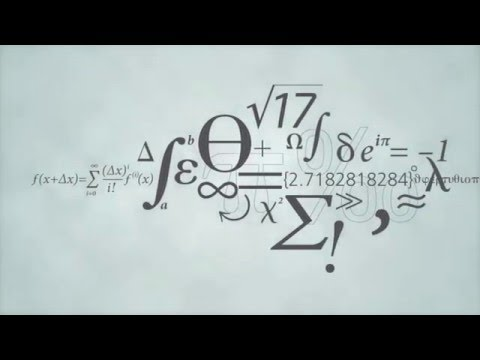

In [1]:
# Video 1. The structure of the course
from IPython.display import YouTubeVideo
YouTubeVideo("42KjmxgYYNI",width=800, height=450)

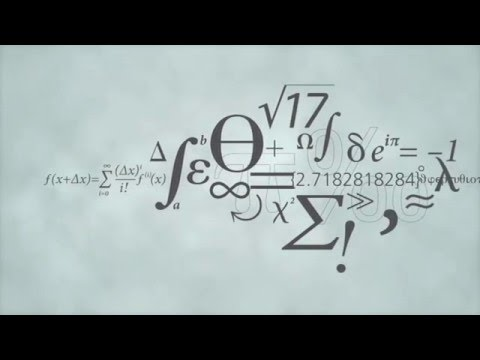

In [2]:
# Video 2: The assignments
YouTubeVideo("sSQBcbQ3FL0",width=800, height=450)

## Part 2: A little visualization exercise


> *Exercise*: 
> 
> Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
> Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  
>
> It's ok to just download these files to disk by right-clicking on each one, but if you use Python and _urllib_ or _urllib2_ to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
> * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is.


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

And the video below generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import urllib
from scipy import stats

%matplotlib inline

In [4]:
## Reading data from internet
res1 = urllib.request.urlopen("https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data1.tsv")
res2 = urllib.request.urlopen("https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data2.tsv")
res3 = urllib.request.urlopen("https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data3.tsv")
res4 = urllib.request.urlopen("https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data4.tsv")

## Converting data to numpy array 

data1 = np.loadtxt(res1)
data2 = np.loadtxt(res2)
data3 = np.loadtxt(res3)
data4 = np.loadtxt(res4)

In [5]:
## Finding Mean
x_m1, y_m1 = data1.mean(axis=0)
x_m2, y_m2 = data2.mean(axis=0)
x_m3, y_m3 = data3.mean(axis=0)
x_m4, y_m4 = data4.mean(axis=0)

In [6]:
print("Mean of Dataset 1 X: %.2f, Y: %.2f"%(x_m1, y_m1))
print("Mean of Dataset 2 X: %.2f, Y: %.2f"%(x_m2, y_m2))
print("Mean of Dataset 3 X: %.2f, Y: %.2f"%(x_m3, y_m3))
print("Mean of Dataset 4 X: %.2f, Y: %.2f"%(x_m4, y_m4))

Mean of Dataset 1 X: 9.00, Y: 7.50
Mean of Dataset 2 X: 9.00, Y: 7.50
Mean of Dataset 3 X: 9.00, Y: 7.50
Mean of Dataset 4 X: 9.00, Y: 7.50


In [7]:
## Finding Variance
x_var1, y_var1 = data1.var(axis=0)
x_var2, y_var2 = data2.var(axis=0)
x_var3, y_var3 = data3.var(axis=0)
x_var4, y_var4 = data4.var(axis=0)

print("Variance of Dataset 1 X: %.3f, Y: %.3f"%(x_var1, y_var1))
print("Variance of Dataset 2 X: %.3f, Y: %.3f"%(x_var2, y_var2))
print("Variance of Dataset 3 X: %.3f, Y: %.3f"%(x_var3, y_var3))
print("Variance of Dataset 4 X: %.3f, Y: %.3f"%(x_var4, y_var4))

Variance of Dataset 1 X: 10.000, Y: 3.752
Variance of Dataset 2 X: 10.000, Y: 3.752
Variance of Dataset 3 X: 10.000, Y: 3.748
Variance of Dataset 4 X: 10.000, Y: 3.748


In [8]:
print("Data 1 Pearson Correlation : %.3f"%np.corrcoef(data1[:,0], data1[:,1])[0,1])
print("Data 2 Pearson Correlation : %.3f"%np.corrcoef(data2[:,0], data2[:,1])[0,1])
print("Data 3 Pearson Correlation : %.3f"%np.corrcoef(data3[:,0], data3[:,1])[0,1])
print("Data 4 Pearson Correlation : %.3f"%np.corrcoef(data4[:,0], data4[:,1])[0,1])

Data 1 Pearson Correlation : 0.816
Data 2 Pearson Correlation : 0.816
Data 3 Pearson Correlation : 0.816
Data 4 Pearson Correlation : 0.817


In [9]:
## Finding line fitting data best
a_slope1, b_intercept1, r_value1, p_value1, std_err1 = stats.linregress(data1[:,0],data1[:,1])
a_slope2, b_intercept2, r_value2, p_value2, std_err2 = stats.linregress(data2[:,0],data2[:,1])
a_slope3, b_intercept3, r_value3, p_value3, std_err3 = stats.linregress(data3[:,0],data3[:,1])
a_slope4, b_intercept4, r_value4, p_value4, std_err4 = stats.linregress(data4[:,0],data4[:,1])

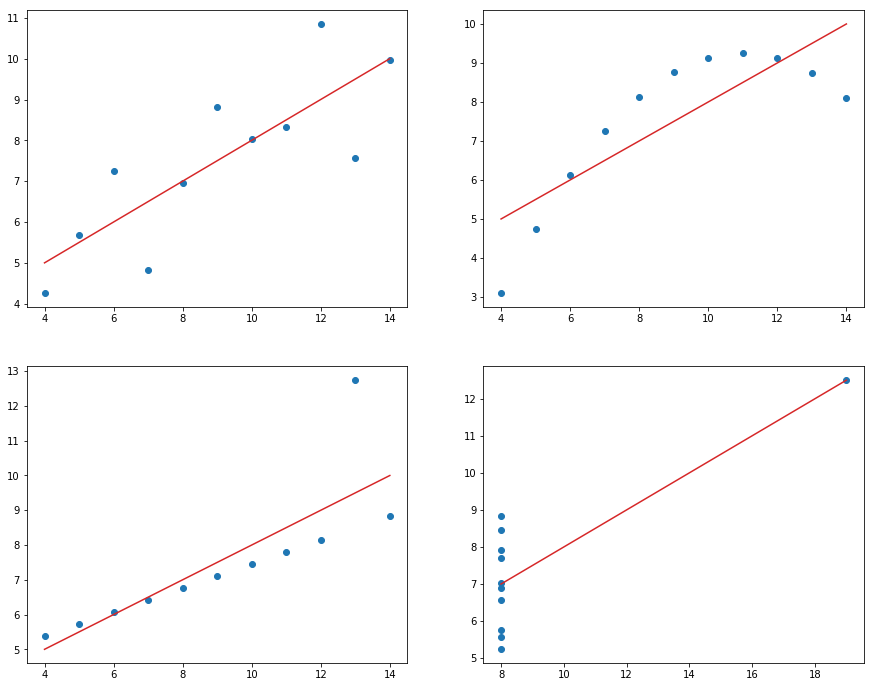

In [10]:
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.scatter(data1[:,0], data1[:,1]) ## Plotting data with scatter plot
y1 = a_slope1 * data1[:,0].min() + b_intercept1
y2 = a_slope1 * data1[:,0].max() + b_intercept1

# Plotting Line which fits data
plt.plot([data1[:,0].min(), data1[:,0].max()],[y1, y2], color="tab:red")

plt.subplot(222)
plt.scatter(data2[:,0], data2[:,1]) ## Plotting data with scatter plot
y1 = a_slope2 * data2[:,0].min() + b_intercept2
y2 = a_slope2 * data2[:,0].max() + b_intercept2

# Plotting Line which fits data
plt.plot([data2[:,0].min(), data2[:,0].max()],[y1, y2], color="tab:red")

plt.subplot(223)
plt.scatter(data3[:,0], data3[:,1]) ## Plotting data with scatter plot
y1 = a_slope3 * data3[:,0].min() + b_intercept3
y2 = a_slope3 * data3[:,0].max() + b_intercept3

# Plotting Line which fits data
plt.plot([data3[:,0].min(), data3[:,0].max()],[y1, y2], color="tab:red")

plt.subplot(224)
plt.scatter(data4[:,0], data4[:,1]) ## Plotting data with scatter plot
y1 = a_slope4 * data4[:,0].min() + b_intercept4
y2 = a_slope4 * data4[:,0].max() + b_intercept4

# Plotting Line which fits data
plt.plot([data4[:,0].min(), data4[:,0].max()],[y1, y2], color="tab:red");

**ANS:** Above exercise was asked for clearing understanding of anscombe's quartet. After doing statistical analysis like mean, median, variance, it seems that all datasets belongs to same distribution. But when visualizing them then we get better idea about distribution which was not visible with statistical analysis.

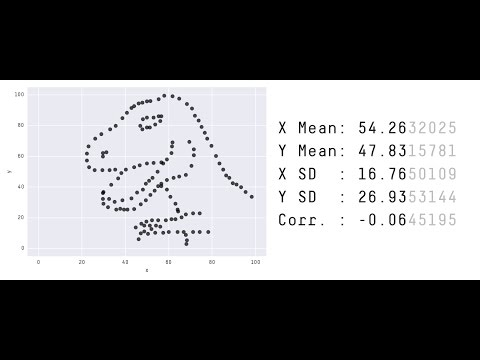

In [11]:
YouTubeVideo("DbJyPELmhJc",width=800, height=450)

## Part 3: Working with the dataset 

The exercises today will continue to focus on the data in the big CSV file. 

Let's start by think a bit more about the crime-data file from San Francisco that you downloaded last week. We'll again only look at the focus-crimes.

In [12]:
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY',
              'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 
              'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, week and across the 24 hours of the day. 
> Again, restrict yourself to the dataset of entire years 2013-2018.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib inline

## Loading Data from https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783
sf_police_df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
sf_police_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200


In [14]:
### Converting various datae time columns to proper format
sf_police_df['Date'] = pd.to_datetime(sf_police_df['Date'])
sf_police_df['Time'] = pd.to_timedelta([val+':00' for val in sf_police_df['Time']])

In [15]:
## Adding Month Column to dataset with month names
sf_police_df["Month"] = [val.month_name() for val in sf_police_df["Date"]] 
sf_police_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month
0,110308742,MISSING PERSON,FOUND PERSON,Friday,2011-04-15,16:00:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,April
1,90316914,WARRANTS,WARRANT ARREST,Thursday,2009-03-26,12:28:00,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010,March
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,2013-02-15,02:00:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200,February
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,2008-01-15,20:13:00,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016,January
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,2007-05-26,18:10:00,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200,May


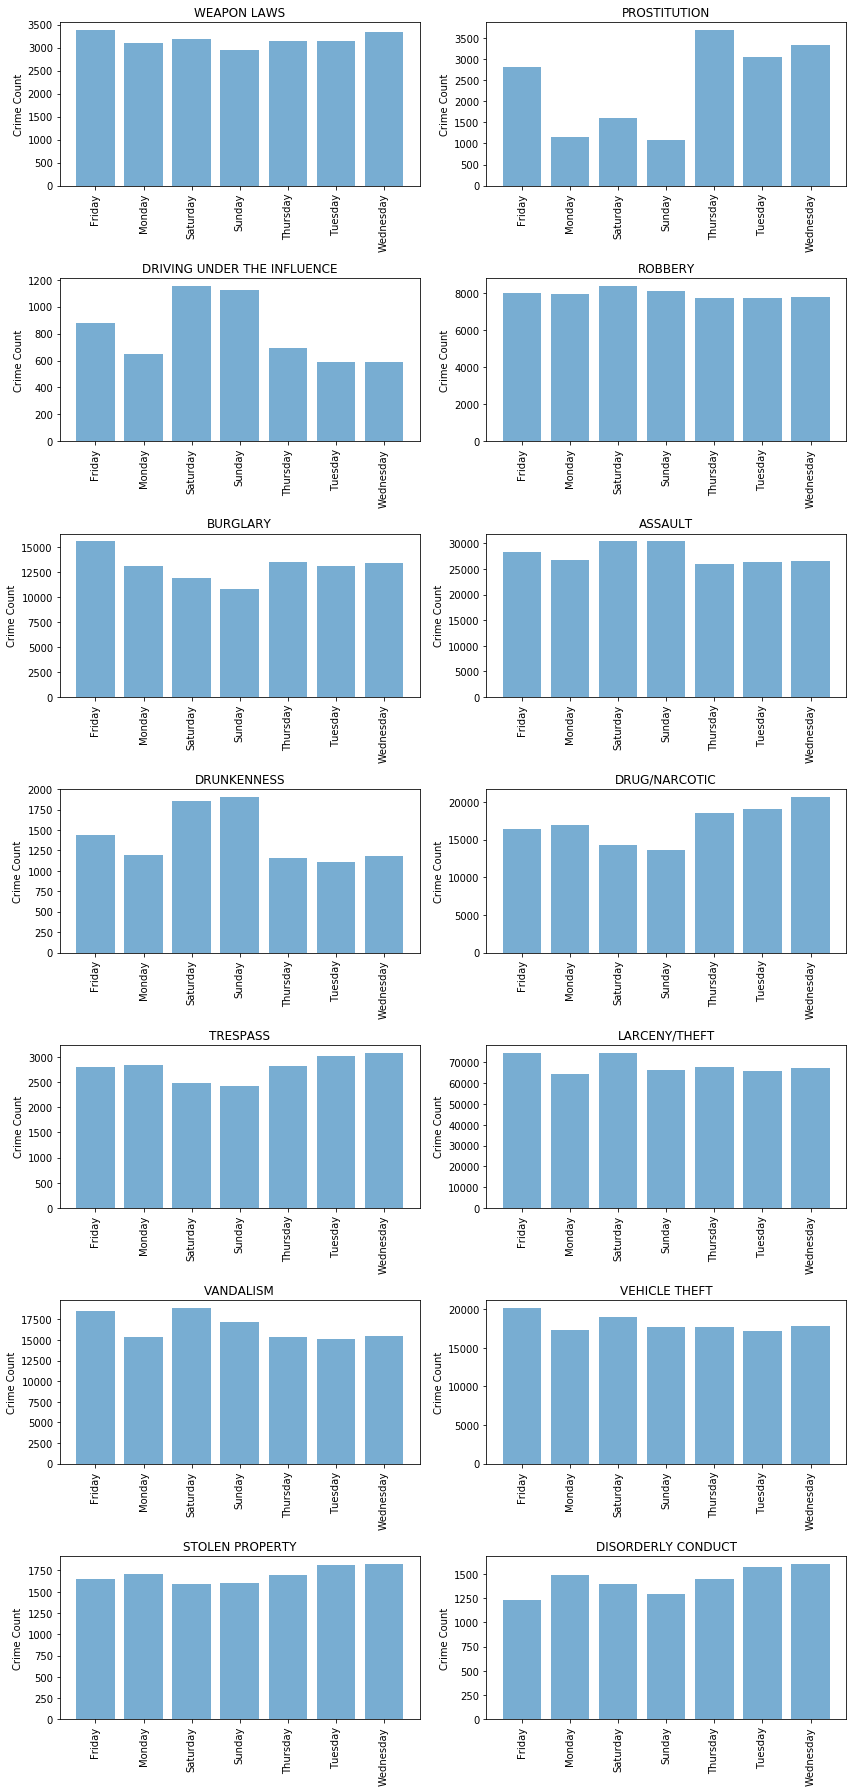

In [21]:
fig = plt.figure(figsize=(12,25))

for i, crime in enumerate(focuscrimes, start=1):
    plt.subplot(7, 2, i) ## Creating subplot of 7x2=14 plots
    ## Subsetting dataset with focus crime dataframe
    sf_police_crime_sub = sf_police_df[sf_police_df["Category"] == crime]
    ## Counting number of incidents for that crime
    sf_police_crime_sub = sf_police_crime_sub.groupby(by="DayOfWeek").count()[['IncidntNum']].rename(columns={"IncidntNum":"Count"})
    sf_police_crime_sub = sf_police_crime_sub.reset_index()
    plt.bar(x=sf_police_crime_sub["DayOfWeek"], height=sf_police_crime_sub["Count"], color="tab:blue",alpha=0.6)
    plt.xticks(rotation=90)
    plt.ylabel("Crime Count")
    plt.title(crime)
    plt.tight_layout()

**ANS** Prostitution seems to be high on Tuesday, Wednesday, Thursday and Friday.

> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

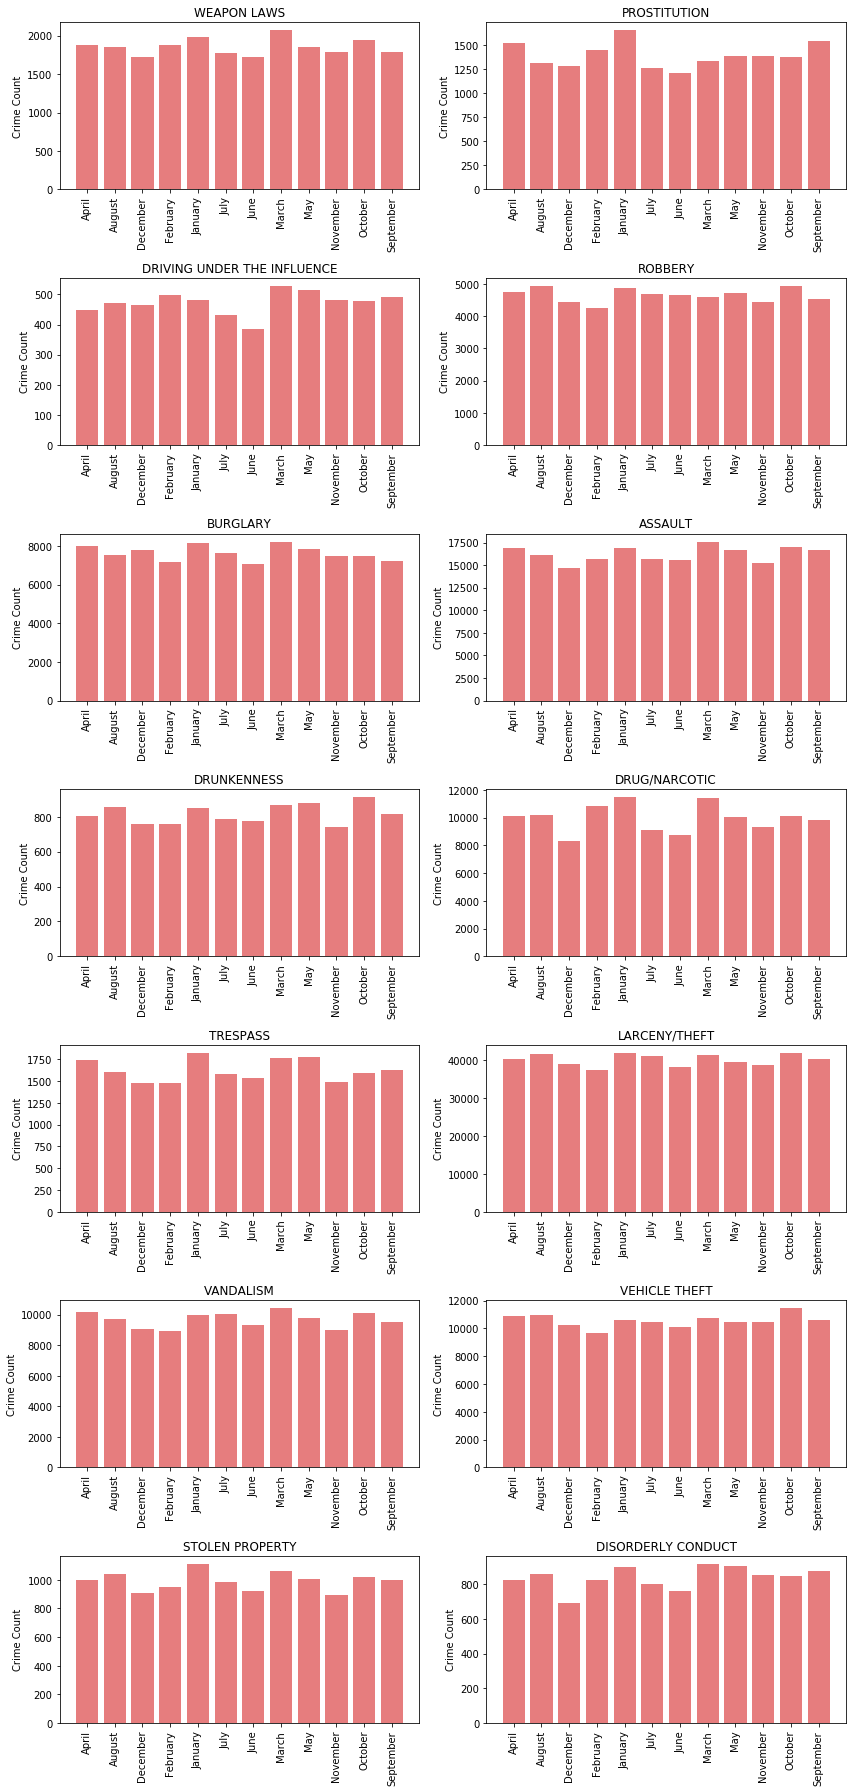

In [22]:
fig = plt.figure(figsize=(12,25))

for i, crime in enumerate(focuscrimes, start=1):
    plt.subplot(7, 2, i)
    sf_police_crime_sub = sf_police_df[sf_police_df["Category"] == crime]
    sf_police_crime_sub = sf_police_crime_sub.groupby(by="Month").count()[['IncidntNum']].rename(columns={"IncidntNum":"Count"})
    sf_police_crime_sub = sf_police_crime_sub.reset_index()
    plt.bar(x=sf_police_crime_sub["Month"], height=sf_police_crime_sub["Count"], color="tab:red",alpha=0.6)
    plt.xticks(rotation=90)
    plt.ylabel("Crime Count")
    plt.title(crime)
    plt.tight_layout()

**ANS:** January generally has high number of crimes that other months.

> * *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

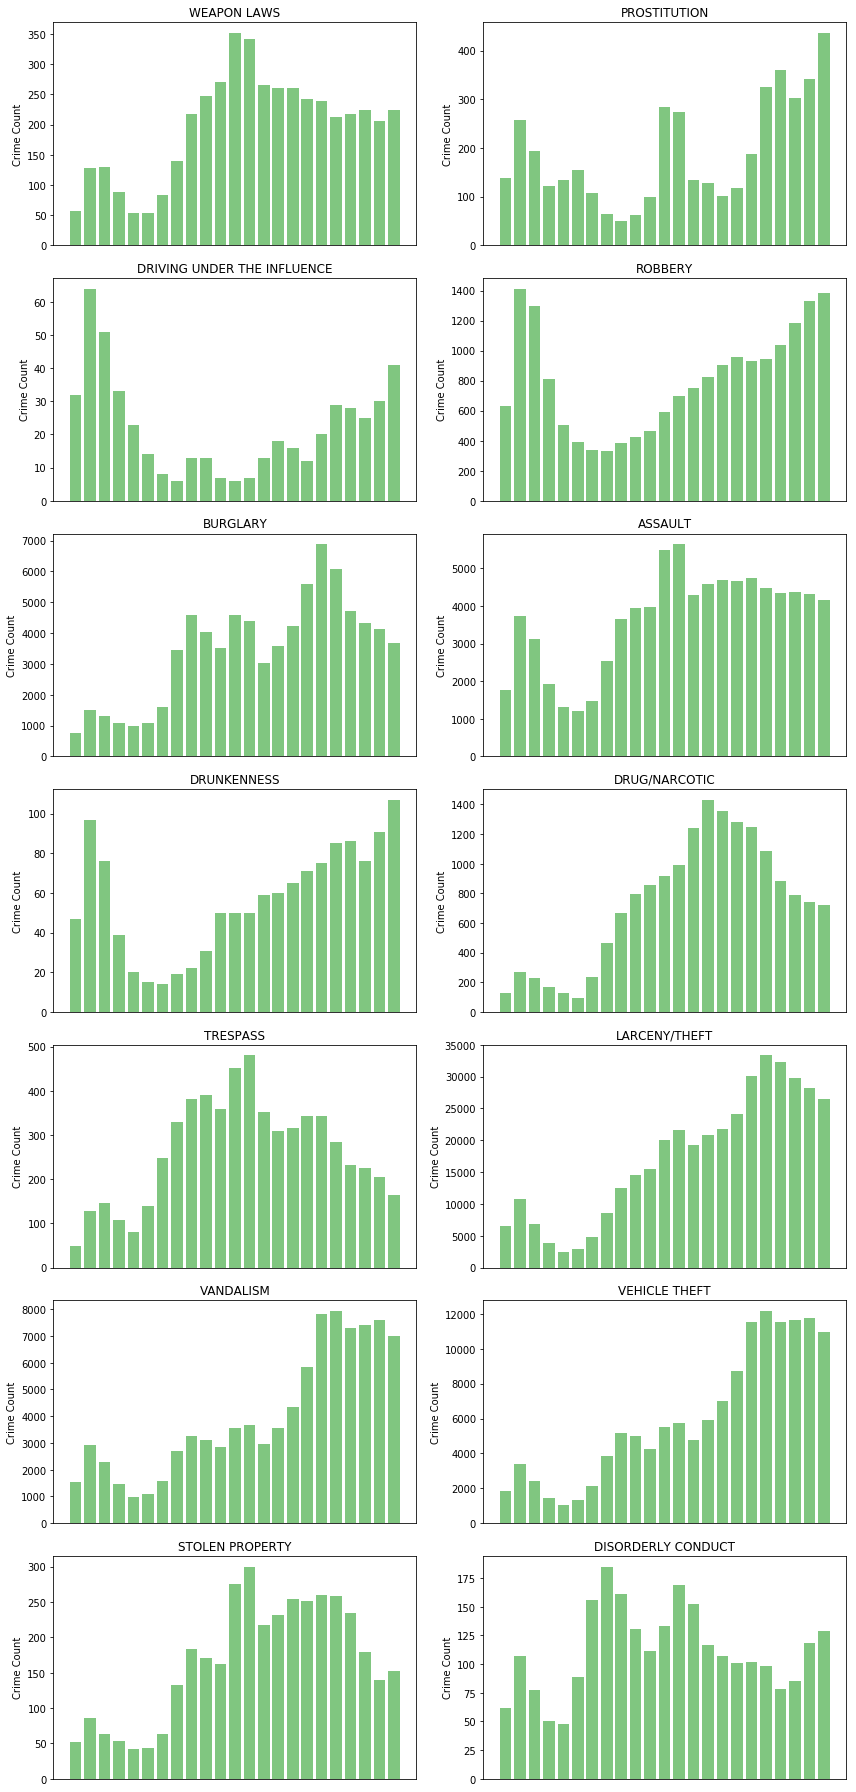

In [24]:
fig = plt.figure(figsize=(12,25))

for i, crime in enumerate(focuscrimes, start=1):
    plt.subplot(7, 2, i)
    sf_police_crime_sub = sf_police_df[sf_police_df["Category"] == crime]
    ticks,cnts = [], []
    for j in range(0,23):
        start = "%d:00:00"%j
        end =   "%d:00:00"%(j+1)
        ticks.append(start + "-" +end)
        cnts.append(sf_police_crime_sub[sf_police_crime_sub["Time"].isin([start, end])].shape[0])    
    plt.bar(x=ticks, height=cnts, color="tab:green", alpha=0.6)
    plt.xticks([], [], rotation=90)
    plt.ylabel("Crime Count")
    plt.title(crime)
    plt.tight_layout()

**ANS:** `WEAPON LAWS, DRUG NARCOTIC, TRESSPASS, STOLEN PROPERTY and DISORDERLY CONDUCT` are higher during mid-day whereas other crimes are higher during night time after 9 PM.

> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

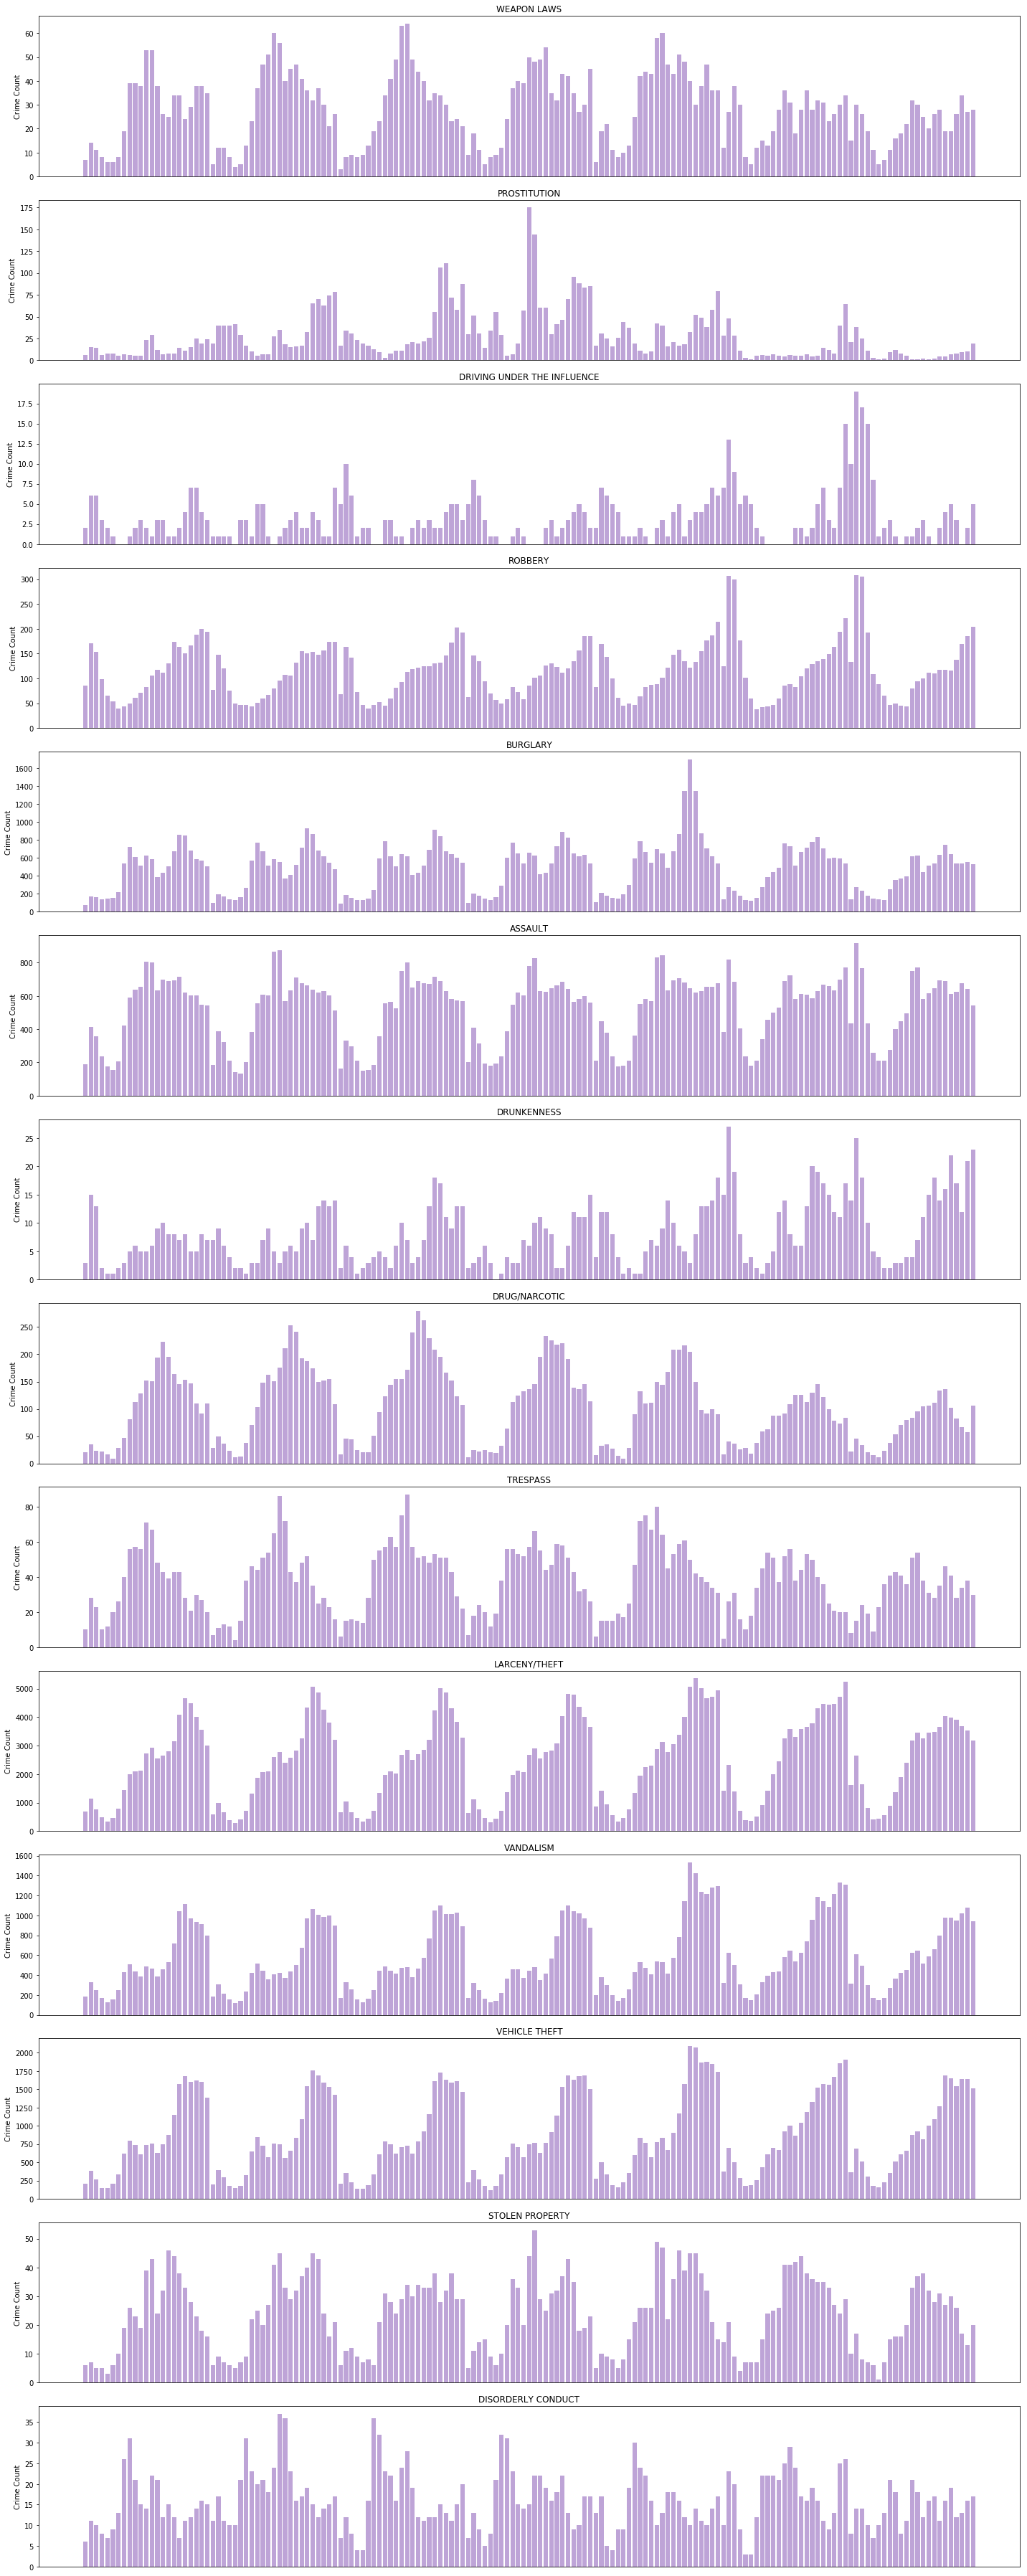

In [26]:
fig = plt.figure(figsize=(20,50))

for i, crime in enumerate(focuscrimes, start=1):
    plt.subplot(14, 1, i)
    ticks,cnts = [], []
    for k, day in [(0,"Monday"),(24,"Tuesday"), (48, "Wednesday"), (72, "Thursday"), (96, "Friday"),
                   (120, "Saturday"), (144, "Sunday")]:
        sf_police_crime_sub = sf_police_df[sf_police_df["Category"] == crime]
        sf_police_crime_sub = sf_police_crime_sub[sf_police_crime_sub["DayOfWeek"] == day]
        for j in range(0,23):
            start, start_tick = "%d:00:00"%j, "%d:00:00"%(j+k) 
            end, end_tick =   "%d:00:00"%(j+1), "%d:00:00"%(j+1+k) 
            ticks.append(start_tick + "-" +end_tick)
            cnts.append(sf_police_crime_sub[sf_police_crime_sub["Time"].isin([start, end])].shape[0])    
    plt.bar(x=ticks, height=cnts, color="tab:purple", alpha=0.6)
    plt.xticks([], [], rotation=90)
    plt.ylabel("Crime Count")
    plt.title(crime)
    plt.tight_layout()

**ANS:** `PROSTITUTION, BURGLARY, STOLEN PROPERTY` are higher during mid-weak whereas others are distributed throughout whole week and high during end of the day.

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercises*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's >neighborhoods. First, simply list the names of SF's 10 police districts.

In [27]:
print("Police Districts : ", sf_police_df["PdDistrict"].unique())

Police Districts :  ['TARAVAL' 'SOUTHERN' 'PARK' 'MISSION' 'NORTHERN' 'BAYVIEW' 'RICHMOND'
 'CENTRAL' 'INGLESIDE' 'TENDERLOIN' nan]


>  * Which has the most crimes? Which has the most focus crimes?

In [28]:
temp = sf_police_df.groupby("PdDistrict").count()[['IncidntNum']].rename(columns={"IncidntNum":"Num_Of_Crimes"})
temp.sort_values(by="Num_Of_Crimes", ascending=False)

,Num_Of_Crimes
PdDistrict,
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479


In [29]:
temp = sf_police_df[sf_police_df["Category"].isin(focuscrimes)].groupby("PdDistrict").count()[['IncidntNum']].rename(columns={"IncidntNum":"Num_Of_Crimes"})
temp.sort_values(by="Num_Of_Crimes", ascending=False)

,Num_Of_Crimes
PdDistrict,
SOUTHERN,231125
NORTHERN,175525
MISSION,167757
CENTRAL,142378
BAYVIEW,118026
TENDERLOIN,108085
INGLESIDE,107654
TARAVAL,92254
PARK,69397


**ANS:** **SOUTHERN** District has both highest number of crime and focus crimes as well.

>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. > That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/categoryhist.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
>      ![Histograms](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/conditional.png)
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Comment**. Notice how much awesome datascience (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right?

In [54]:
crime_probs = []
## Below for loop calculates probability of each focus crime in total dataset p(crime)
## by dividing count of crime with total rows in dataset
for crime in focuscrimes:
    temp = sf_police_df[sf_police_df["Category"] == crime]
    prob = temp.shape[0]/ sf_police_df.shape[0]
    crime_probs.append((crime, prob))
print("Crime Probability : ", crime_probs)

Crime Probability :  [('WEAPON LAWS', 0.01003781448869177), ('PROSTITUTION', 0.0075398731571305775), ('DRIVING UNDER THE INFLUENCE', 0.0025606946019546516), ('ROBBERY', 0.02522184861202407), ('BURGLARY', 0.041328220371427124), ('ASSAULT', 0.08789701601427344), ('DRUNKENNESS', 0.004436069315727505), ('DRUG/NARCOTIC', 0.05400754122754426), ('TRESPASS', 0.008780491768937944), ('LARCENY/THEFT', 0.21690419607191616), ('VANDALISM', 0.052396272004276254), ('VEHICLE THEFT', 0.05715603984426354), ('STOLEN PROPERTY', 0.005368339124090755), ('DISORDERLY CONDUCT', 0.0045326822643908145)]


In [55]:
crime_probs_district = {}

## Below for loop count probability of crime in particular district P(crime|district)
## by dividing count of occuring crime in that district with total count of crime in district
for district in sf_police_df['PdDistrict'].unique():
    #print(district)
    temp = sf_police_df[sf_police_df["PdDistrict"] == district]
    crime_probs_dist = []
    for crime in focuscrimes:
        temp1 = temp[temp["Category"] == crime]
        prob = temp1.shape[0]/ sf_police_df.shape[0]
        crime_probs_dist.append((crime, prob))
    crime_probs_district[district] = crime_probs_dist

In [56]:
ratios = {}
## Below for loop constructs ratio of P(crime|district) / P(crime) for each district
for district in crime_probs_district.keys():
    crime_prob_div1 = np.array([v2 for v1,v2 in crime_probs_district[district]])
    crime_prob_div2 = np.array([v2 for v1,v2 in crime_probs])
    ratios[district] = crime_prob_div1 / crime_prob_div2

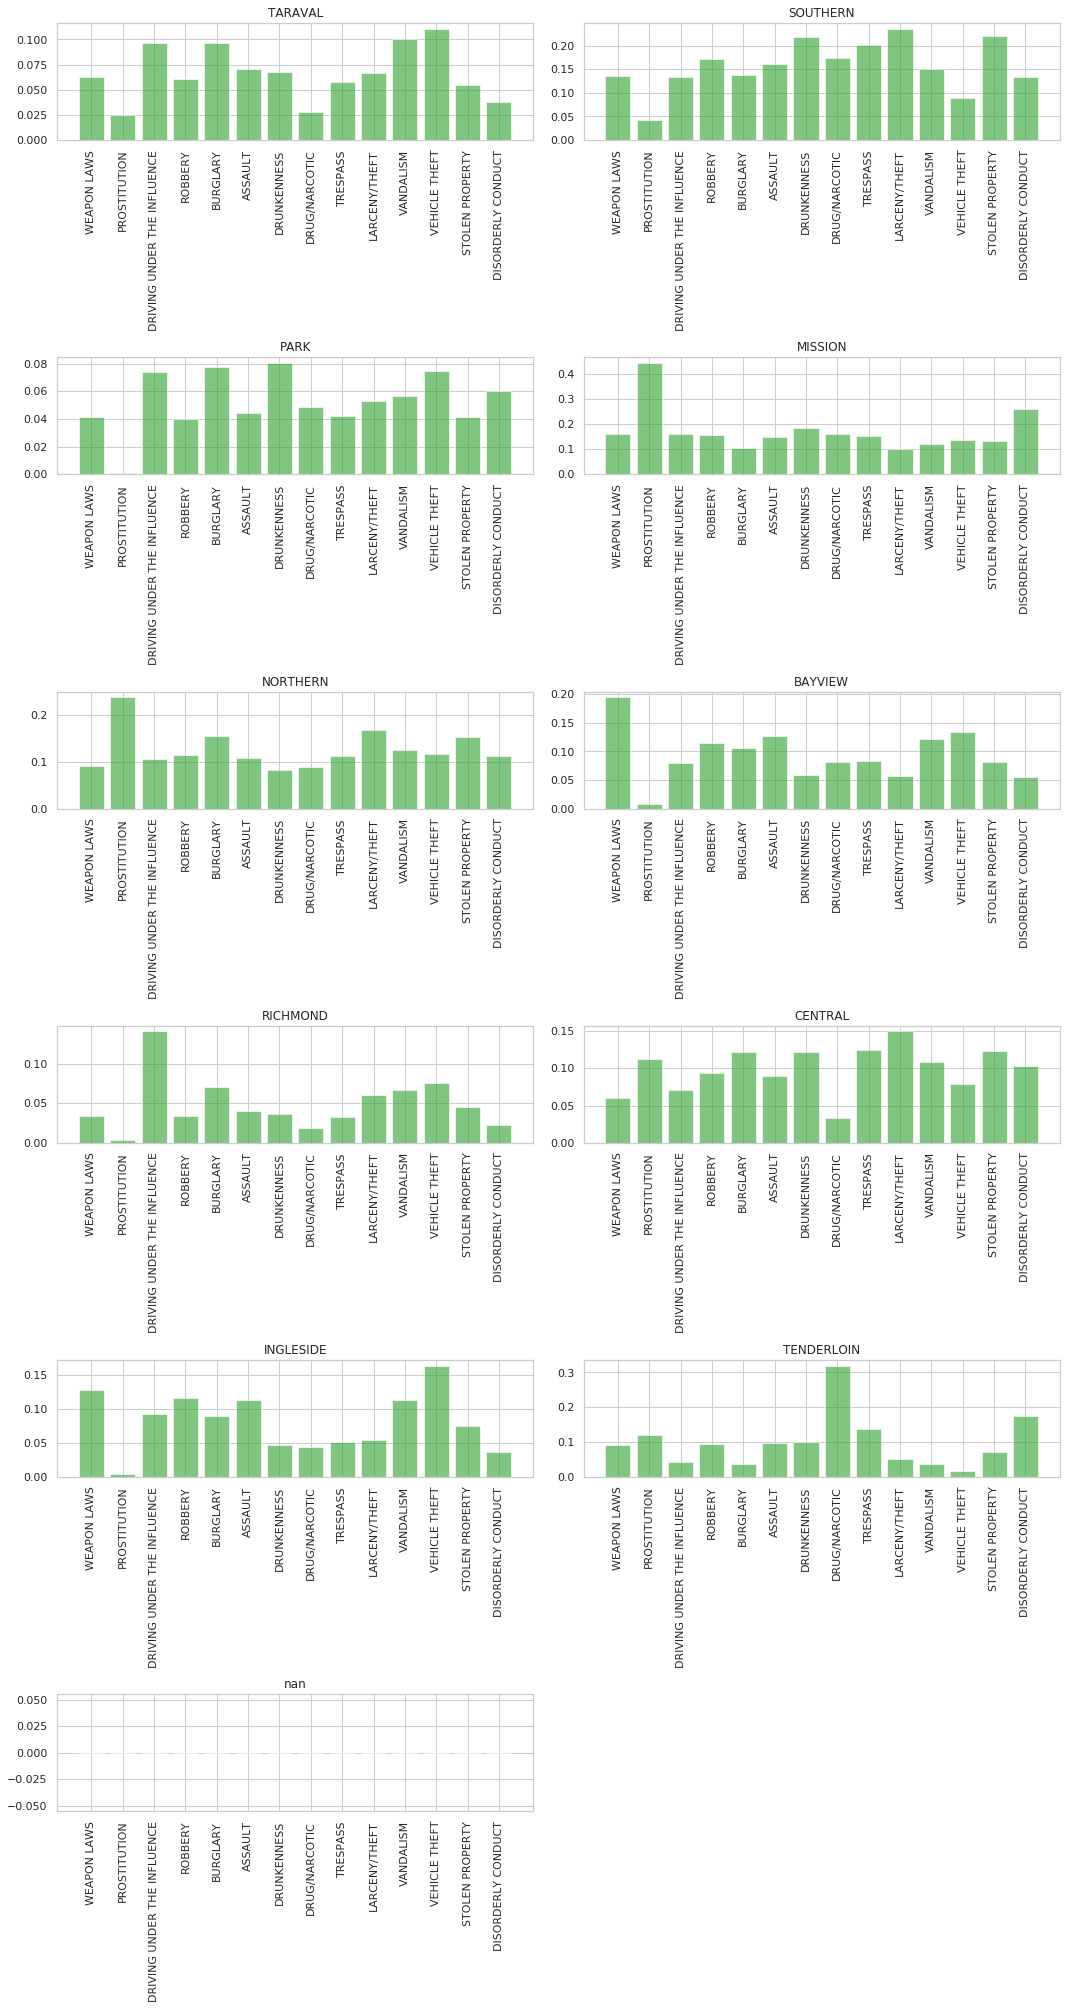

In [58]:
plt.figure(figsize=(15,30))
for i, district in enumerate(ratios.keys(), start=1):        
    plt.subplot(7,2,i)
    crimes = [v1 for v1,v2 in crime_probs]
    plt.bar(crimes, ratios[district], color="tab:green", alpha=0.6)
    plt.title(district)
    plt.xticks(rotation=90)
    plt.tight_layout()

## Part 4: Visualizing Geo-data
Finally, we will draw on the fact that the crime data has lots of exciting geo-data attached. We'll take our inspiration from the implementation shown in the [following article](https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f) for plotting the GPS data. The article describes how you can visualize geo-data using the `Pandas` and `Matplotlib` packages.

> *Exercise:* We will try to find out where it is safest to leave your car on a Sunday.
> * Step 0: Read the [tutorial](https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f) to get a sense of the flow of things.
> * Start your own work by downloading the [GeoJSON](https://wiki.fileformat.com/gis/geojson/) file [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/sfpddistricts.geojson).
> * There are a number of formats for geographical areas, and the article uses *ShapeFiles*, so you will have to convert GeoJSON (one geo-spatial file formate) to ShapeFiles (another geo-spatial file formate), [see the stackoverflow topic](https://stackoverflow.com/a/44050383). Hint: The idea is to is to import the `subprocess` package and copy the last two lines of the solution. 
> * *Hint: it may require that you install the python package gdal with* `conda install gdal`. *More details on slack* 

In [34]:
import urllib, geojson, gdal, subprocess

url= ' https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/sfpddistricts.geojson'
response = urllib.request.urlopen(url)
data = geojson.loads(response.read())

with open('data.geojson', 'w') as f:
    geojson.dump(data, f)

## Perform below steps in shell manually
#args = ['ogr2ogr', '-f', 'ESRI Shapefile', 'data.geojson', 'destination_data.shp']
#subprocess.Popen(args)

> * Now, play around with the functions in the 6-9 parts of the article. See if you can generate something like the plot below
![heat map](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/heat_maps_simple.png)
> Take a moment to congratulate yourself. You now know how to select and format shapefiles!

In [35]:
import shapefile as shp
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

%matplotlib inline

In [36]:
sf = shp.Reader("destination_data.shp")

In [37]:
len(sf.shapes())

10

In [38]:
sf.records()[1]

Record #1: [2, 'SOUTHERN', 'B']

In [39]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

shape_df = read_shapefile(sf)
shape_df

,OBJECTID,DISTRICT,COMPANY,coords
0,1,CENTRAL,A,"[(-122.405321, 37.806868), (-122.404401, 37.80..."
1,2,SOUTHERN,B,"[(-122.388219, 37.789996), (-122.388077, 37.79..."
2,3,BAYVIEW,C,"[(-122.393416, 37.708412), (-122.393487, 37.70..."
3,4,MISSION,D,"[(-122.408017, 37.769405), (-122.407672, 37.76..."
4,5,PARK,F,"[(-122.44665, 37.775876), (-122.446825, 37.776..."
5,6,RICHMOND,G,"[(-122.448049, 37.78237), (-122.448044, 37.782..."
6,7,INGLESIDE,H,"[(-122.408299, 37.708331), (-122.410095, 37.70..."
7,8,TARAVAL,I,"[(-122.455521, 37.710987), (-122.455597, 37.71..."
8,9,NORTHERN,E,"[(-122.445652, 37.805367), (-122.443985, 37.80..."
9,10,TENDERLOIN,J,"[(-122.417949, 37.786023), (-122.416543, 37.78..."


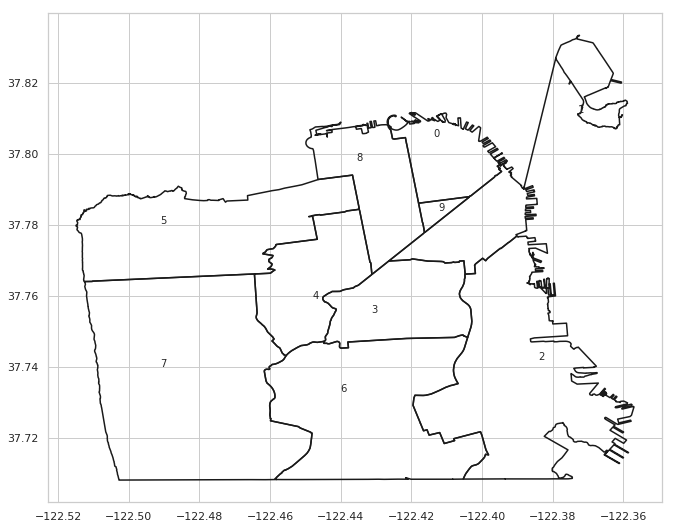

In [40]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    ##Looping through all shape records
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]] ## Getting longitude 
        y = [i[1] for i in shape.shape.points[:]] ## Getting latitude
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10) ## Printing id of district
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
 
plot_map(sf)

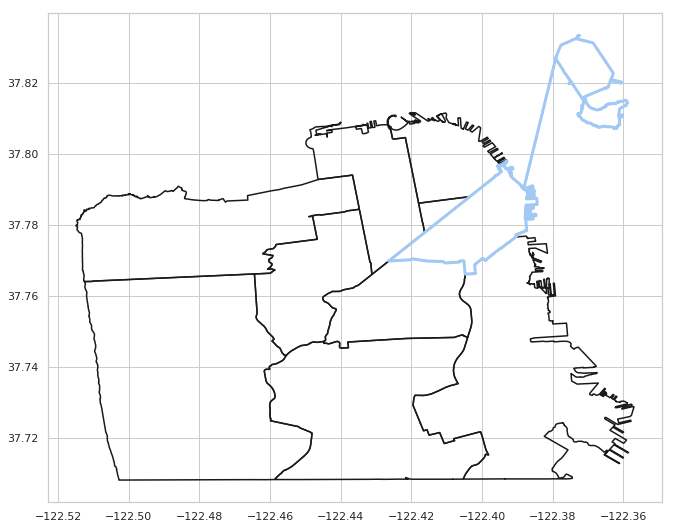

In [41]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    ##Looping through shapes
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    ## Getting one shape with id which needs to be highlighted
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'b', linewidth=3) ## Plotting highlighted area with different color
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
plot_map2(1, sf)

<Figure size 792x648 with 0 Axes>

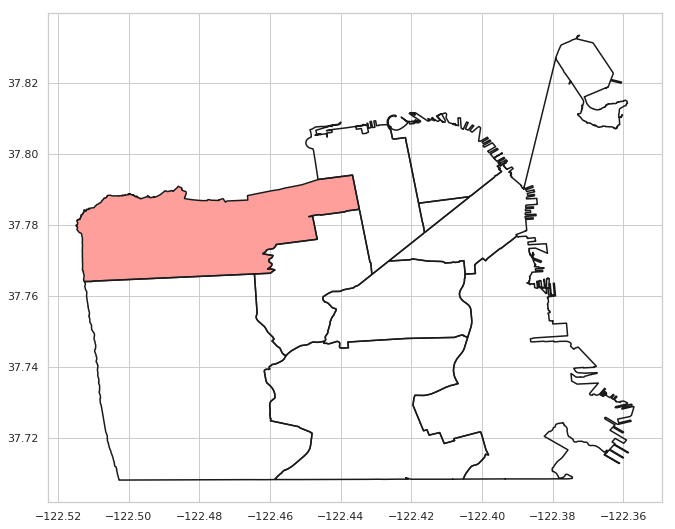

In [42]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    ##Looping through shapes
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
    
    ## Getting one shape with id which needs to be highlighted
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)  ## Filling highlighted area with different color
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

plot_map_fill(5, sf)

<Figure size 792x648 with 0 Axes>

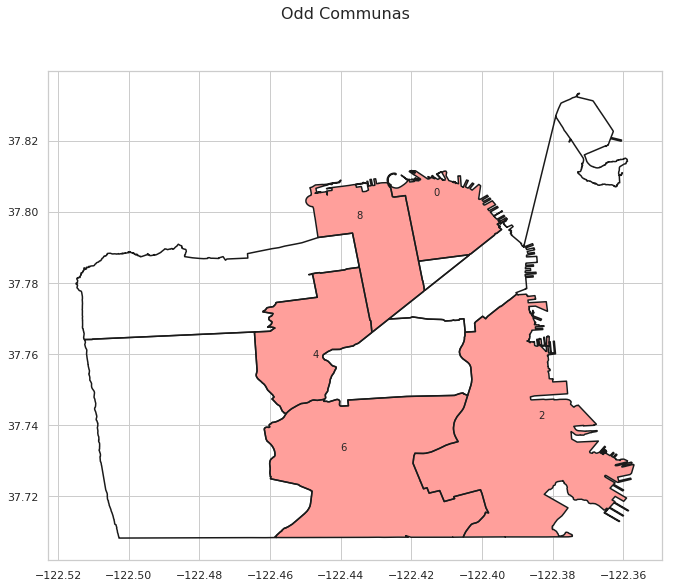

In [43]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    ## Looping through all shape ponts to create main plot
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    ##Looping thorugh list of ids which needs to be filled in
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
plot_map_fill_multiples_ids("Odd Communas",[0,2,4,6,8], sf)

> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * The result should look more or less like the plot below. 
>   - You do not have to change the color pallete ... or put the names of the districts above the map (as it requires that you change some parts of the functions: `plot_districts_data`, `plot_map_fill_multiples_ids_tone` and `calc_color`) ... but if you feel confident with Python - go for it! 
![heat map](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/sf_heatmap.png)
> * Based on your map, where should you park the car for it to be safest? And where's the worst place?
> *Try this for Extra credit:*
> * Create plots for the same crime type, but different days -> comment on the results

(Credit: Thank you to TA Germans Savcisens for helping put this exercise together)

In [45]:
sf_police_df.Category.unique()

array(['MISSING PERSON', 'WARRANTS', 'SECONDARY CODES', 'OTHER OFFENSES',
       'LARCENY/THEFT', 'FORGERY/COUNTERFEITING', 'ASSAULT',
       'DRUG/NARCOTIC', 'NON-CRIMINAL', 'BURGLARY', 'VANDALISM',
       'DRUNKENNESS', 'ROBBERY', 'VEHICLE THEFT', 'KIDNAPPING', 'FRAUD',
       'PROSTITUTION', 'DISORDERLY CONDUCT', 'STOLEN PROPERTY',
       'RECOVERED VEHICLE', 'LIQUOR LAWS', 'WEAPON LAWS',
       'SUSPICIOUS OCC', 'TRESPASS', 'EMBEZZLEMENT', 'RUNAWAY',
       'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES, FORCIBLE',
       'BAD CHECKS', 'SEX OFFENSES, NON FORCIBLE', 'SUICIDE',
       'FAMILY OFFENSES', 'ARSON', 'LOITERING', 'GAMBLING', 'BRIBERY',
       'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object)

In [46]:
## Subsetting dataset to include only vehicle theft as crime type
car_theft_data = sf_police_df[sf_police_df["Category"] == "VEHICLE THEFT"]
## Subsetting dataset to take only entries of Sunday
car_theft_data = car_theft_data[car_theft_data["DayOfWeek"] == "Sunday"]
print(car_theft_data.shape)

(17694, 14)


In [48]:
#IncidntNum	Category	Descript	DayOfWeek	Date	Time	PdDistrict	Resolution	Address	
## Getting count of district wise vehicle theft for each district
car_theft_data = car_theft_data.groupby(by="PdDistrict").count()[["IncidntNum"]].rename(columns={"IncidntNum":"Count"})
car_theft_data = car_theft_data.reset_index()
car_theft_data["PdDistrict"] = car_theft_data["PdDistrict"].str.upper()
car_theft_data

,PdDistrict,Count
0,BAYVIEW,2344
1,CENTRAL,1506
2,INGLESIDE,2855
3,MISSION,2406
4,NORTHERN,2006
5,PARK,1329
6,RICHMOND,1368
7,SOUTHERN,1569
8,TARAVAL,1954
9,TENDERLOIN,357


In [49]:
## Merging shape dataframe with district wise crime count dataset
combined_df = shape_df.merge(car_theft_data, left_on="DISTRICT", right_on="PdDistrict")
combined_df

,OBJECTID,DISTRICT,COMPANY,coords,PdDistrict,Count
0,1,CENTRAL,A,"[(-122.405321, 37.806868), (-122.404401, 37.80...",CENTRAL,1506
1,2,SOUTHERN,B,"[(-122.388219, 37.789996), (-122.388077, 37.79...",SOUTHERN,1569
2,3,BAYVIEW,C,"[(-122.393416, 37.708412), (-122.393487, 37.70...",BAYVIEW,2344
3,4,MISSION,D,"[(-122.408017, 37.769405), (-122.407672, 37.76...",MISSION,2406
4,5,PARK,F,"[(-122.44665, 37.775876), (-122.446825, 37.776...",PARK,1329
5,6,RICHMOND,G,"[(-122.448049, 37.78237), (-122.448044, 37.782...",RICHMOND,1368
6,7,INGLESIDE,H,"[(-122.408299, 37.708331), (-122.410095, 37.70...",INGLESIDE,2855
7,8,TARAVAL,I,"[(-122.455521, 37.710987), (-122.455597, 37.71...",TARAVAL,1954
8,9,NORTHERN,E,"[(-122.445652, 37.805367), (-122.443985, 37.80...",NORTHERN,2006
9,10,TENDERLOIN,J,"[(-122.417949, 37.786023), (-122.416543, 37.78...",TENDERLOIN,357


In [50]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']
            colors = 'Purples'
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4', '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000', '#ff0000','#ff0000','#ff0000']
        else:            
            color_sq = ['#ffffd4','#fee391','#fec44f', '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
            
        new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            ## Looping through all colors to show intensity according to color
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [51]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    ## Looping through shapes of each district and plotting them on map
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
        ## Plotting each district with intensity based on crime rate
        for id in comuna:
            shape_ex = sf.shape(id)
            x_lon = np.zeros((len(shape_ex.points),1))
            y_lat = np.zeros((len(shape_ex.points),1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
            ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, combined_df.loc[id]["DISTRICT"], fontsize=10)
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)

In [52]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(shape_df[shape_df.DISTRICT == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));


1: 357 => 1347 
2: 1348 => 1505 
3: 1506 => 1760 
4: 1761 => 2005 
5: 2006 => 2374 
6: 2375 => 2854 

   1   2   3   4   5   6


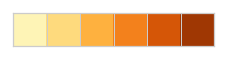

<Figure size 792x648 with 0 Axes>

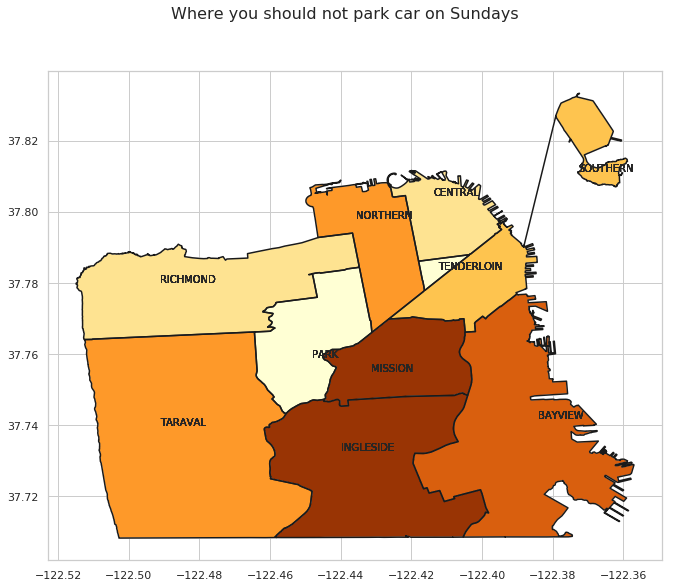

In [53]:
plot_comunas_data(sf, "Where you should not park car on Sundays", combined_df.DISTRICT, data=combined_df.Count, print_id=True)